In [1]:
import json
import requests
import pandas as pd
from k import api_key
import matplotlib.pyplot as plt

In [2]:
cx = "000783178101923127511:vw462omy5uo"
url = "https://www.googleapis.com/customsearch/v1?"

total_results = []
months = []
hits11 = []
hits22 = []

for x in range(37, 0, -1):
    print(x)
    timeperiod1 = 'm' + str(x)
    parameters1 = {"q": "yodelling walmart boy",
              "cx": cx,
              "key": api_key,
              "dateRestrict": timeperiod1
              }
    timeperiod2 = 'm' + str(x+1)
    parameters2 = {"q": "yodelling walmart boy",
              "cx": cx,
              "key": api_key,
              "dateRestrict": timeperiod2
              }
    
    #time.sleep(2)
    page1 = requests.request("GET", url, params=parameters1)
    page2 = requests.request("GET", url, params=parameters2)
    
    results1 = json.loads(page1.text)
    results2 = json.loads(page2.text)
    
    #print(results)
    hits1 = results1["searchInformation"]["totalResults"]
    hits1 = int(hits1)
    hits2 = results2["searchInformation"]["totalResults"]
    hits2 = int(hits2)
    hits11.append(hits1)
    hits22.append(hits2)
    
    #print(hits)
    hits_permon = hits2 - hits1
    total_results.append(hits_permon)
    months.append("M" + str(x+1))

37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [33]:
hits11

[673,
 668,
 666,
 666,
 665,
 664,
 660,
 660,
 659,
 658,
 657,
 657,
 656,
 655,
 655,
 652,
 646,
 644,
 644,
 642,
 639,
 635,
 635,
 625,
 616,
 581,
 581,
 507,
 339,
 340,
 306,
 289,
 266,
 268,
 254,
 217,
 186]

In [34]:
hits22

[673,
 673,
 668,
 666,
 666,
 665,
 664,
 660,
 660,
 659,
 658,
 657,
 657,
 656,
 655,
 655,
 652,
 646,
 644,
 644,
 642,
 639,
 635,
 625,
 625,
 616,
 581,
 581,
 512,
 339,
 340,
 306,
 289,
 266,
 268,
 254,
 217]

In [35]:
total_results

[0,
 5,
 2,
 0,
 1,
 1,
 4,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 3,
 6,
 2,
 0,
 2,
 3,
 4,
 0,
 0,
 9,
 35,
 0,
 74,
 173,
 -1,
 34,
 17,
 23,
 -2,
 14,
 37,
 31]

In [36]:
mon_df = pd.DataFrame({
    "Months": months,
    "Results": total_results
})
mon_df

,Months,Results
0,M38,0
1,M37,5
2,M36,2
3,M35,0
4,M34,1
5,M33,1
6,M32,4
7,M31,0
8,M30,1
9,M29,1


<function matplotlib.pyplot.show(*args, **kw)>

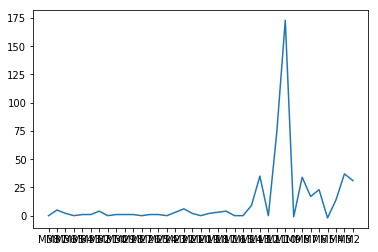

In [37]:
plt.plot(months, total_results)
plt.show